In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import random

In [2]:
df = pd.read_csv('cancer_dataset_wpbc.csv')
df.head()

,ID,Outcome,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,...,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [3]:
df[0:140]

,ID,Outcome,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,...,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,9012000,R,2,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.2448,...,195.00,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574,3.0,1.0
136,901288,N,54,20.64,17.35,134.80,1335.0,0.09446,0.10760,0.1527,...,166.80,1946.0,0.1562,0.3055,0.4159,0.2112,0.2689,0.07055,4.0,0.0
137,9013838,N,7,11.08,18.83,73.30,361.6,0.12160,0.21540,0.1689,...,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.14030,2.0,0.0
138,90291,N,57,14.60,23.29,93.97,664.7,0.08682,0.06636,0.0839,...,102.20,758.2,0.1312,0.1581,0.2675,0.1359,0.2477,0.06836,3.0,0.0


In [4]:
df.shape[0]

198

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       198 non-null    int64  
 1   Outcome                  198 non-null    object 
 2   Time                     198 non-null    int64  
 3   Mean Radius              198 non-null    float64
 4   Mean Texture             198 non-null    float64
 5   Mean Perimeter           198 non-null    float64
 6   Mean Area                198 non-null    float64
 7   Mean Smoothness          198 non-null    float64
 8   Mean Compactness         198 non-null    float64
 9   Mean Concavity           198 non-null    float64
 10  Mean Concave Points      198 non-null    float64
 11  Mean Symmetry            198 non-null    float64
 12  Mean Fractal Dimension   198 non-null    float64
 13  SE Radius                198 non-null    float64
 14  SE Texture               1

## Question 1  
### Exploratory Data Analysis

## Question 1.a

In [6]:
# Q1.a
# Use describe method for fav stats
cols = ['Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points']
df[cols].describe()

,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points
count,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776
std,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877
min,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310
25%,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670
50%,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075
75%,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925
max,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200


## Question 1.b

In [7]:
#Q1.b

df[['Outcome']].describe()

,Outcome
count,198
unique,2
top,N
freq,151


## Question 1.c

In [8]:
final_data = pd.get_dummies(df, columns = ['Outcome'])          #get_dummies for converting categorical to numerical
final_data = final_data.drop(['Outcome_N'], axis = 1)
final_data = final_data.rename(columns = {'Outcome_R': 'Outcome'})
final_data.head()

,ID,Time,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status,Outcome
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0,False
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0,False
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0,False
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0,False
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0,True


In [9]:
cols_all = list(final_data.columns)
num_cols = [x for x in cols_all if x not in ['ID', 'Outcome']]

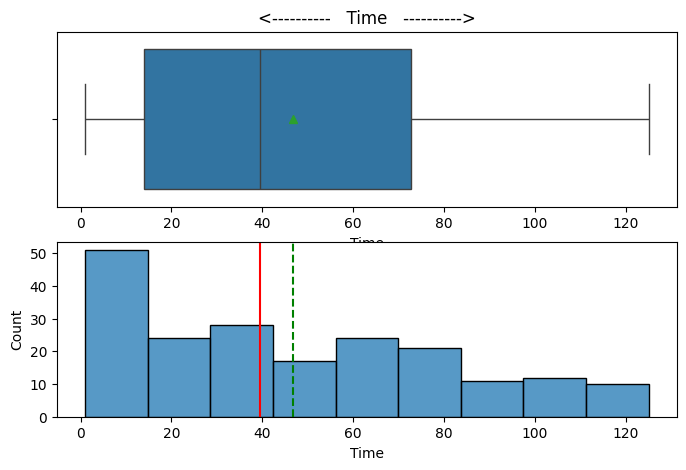

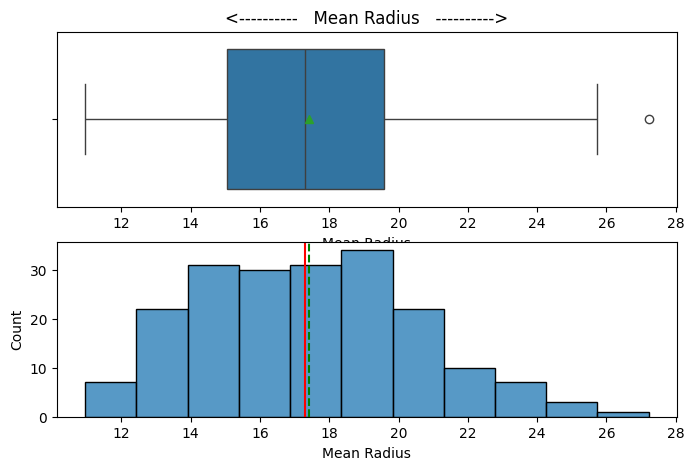

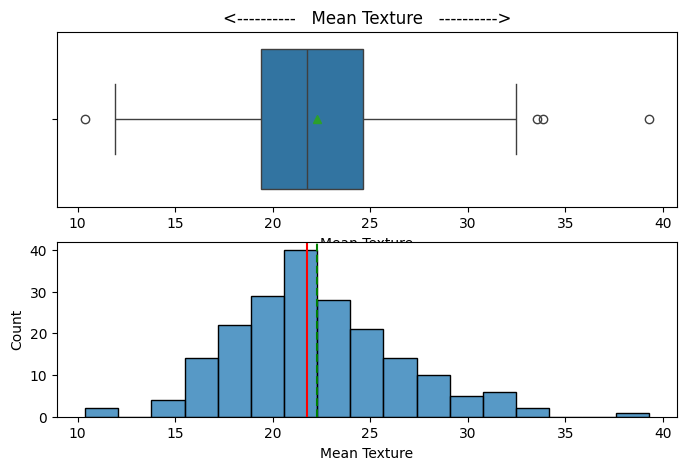

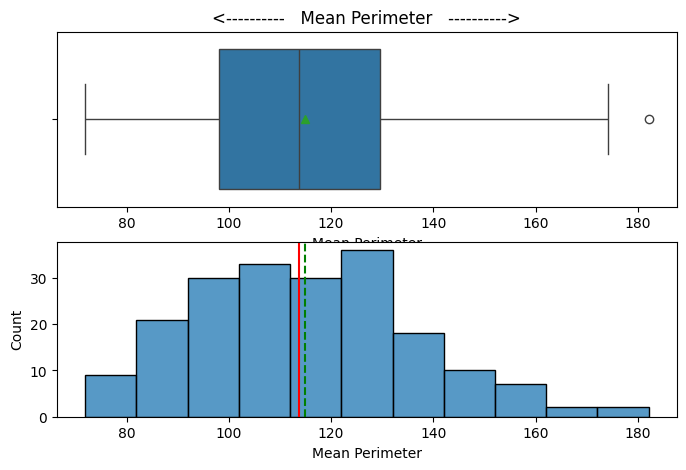

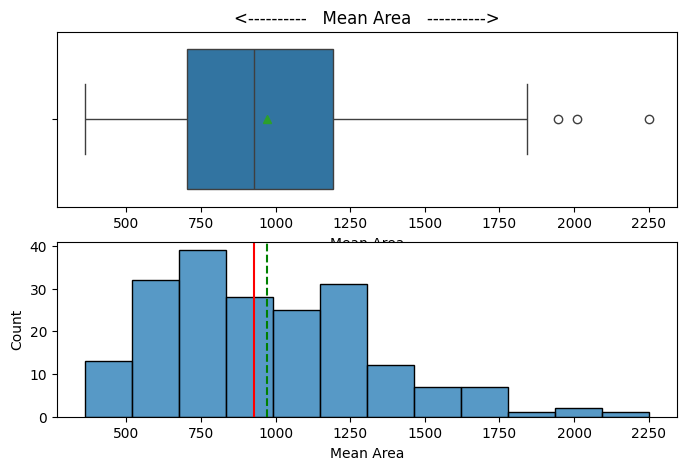

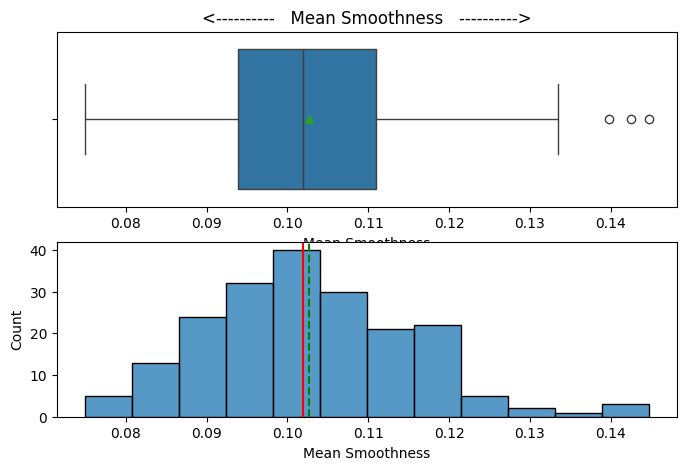

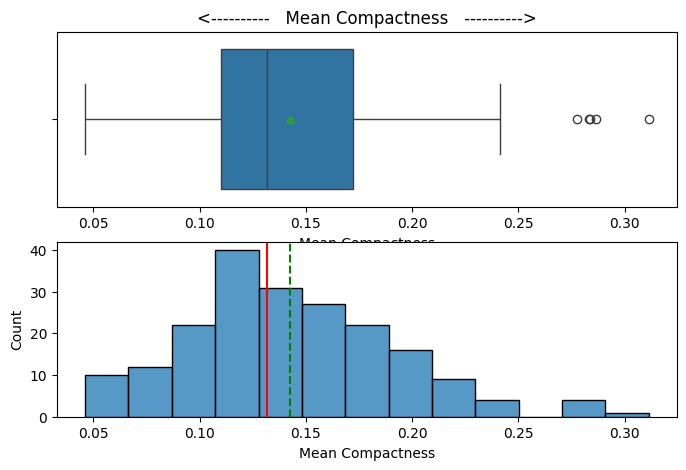

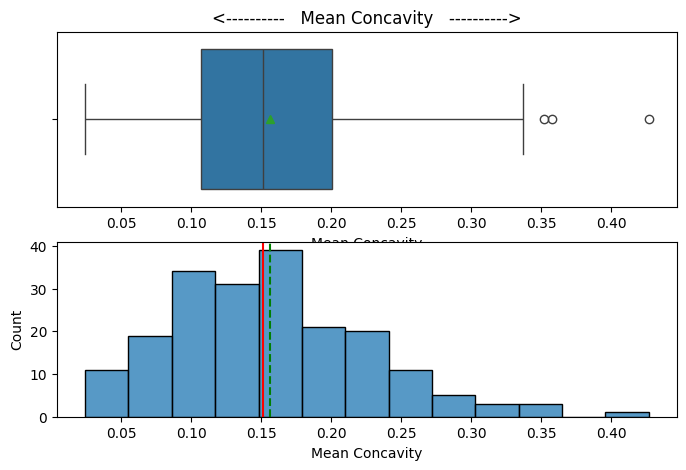

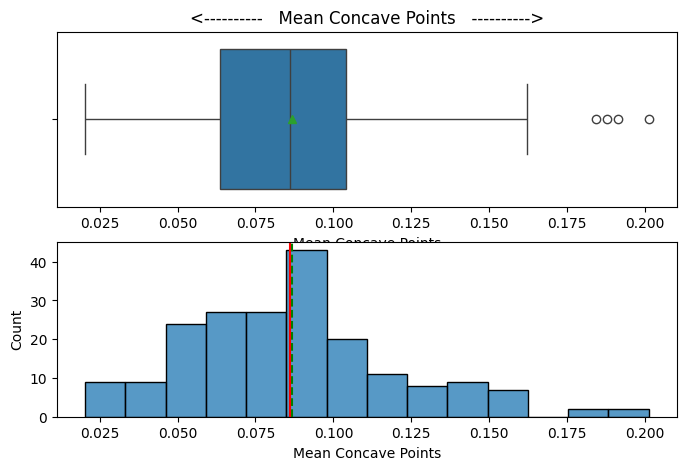

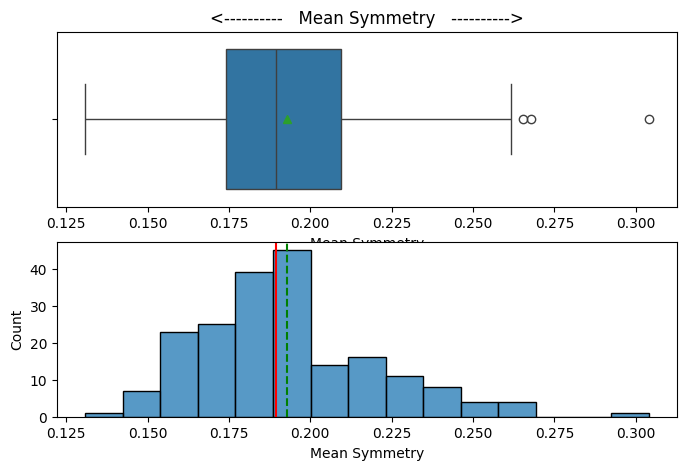

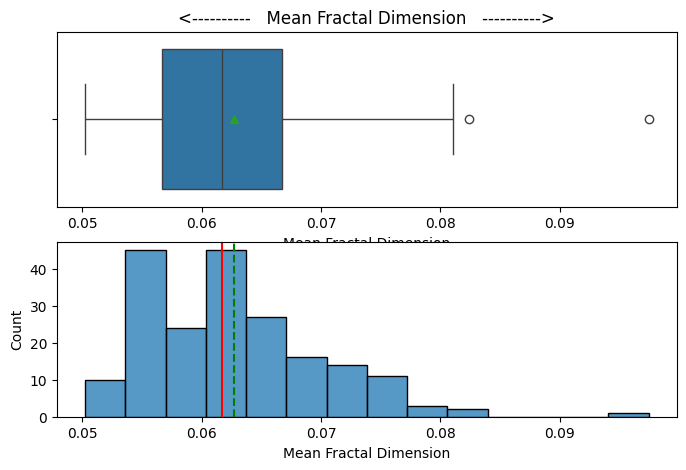

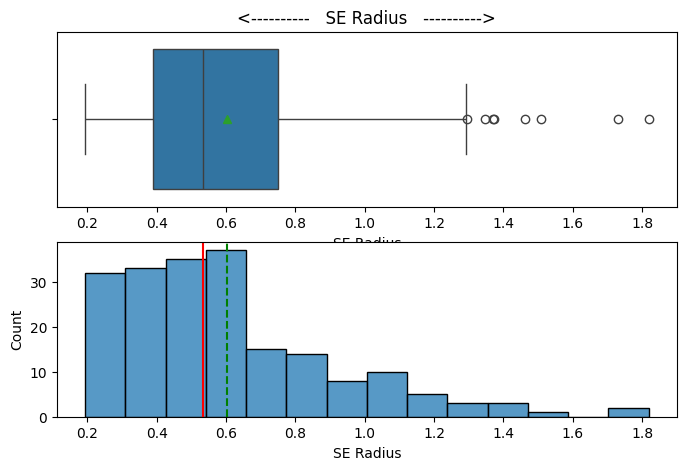

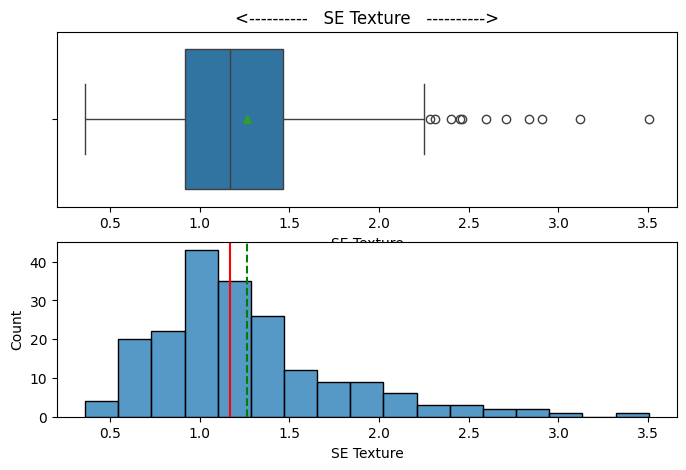

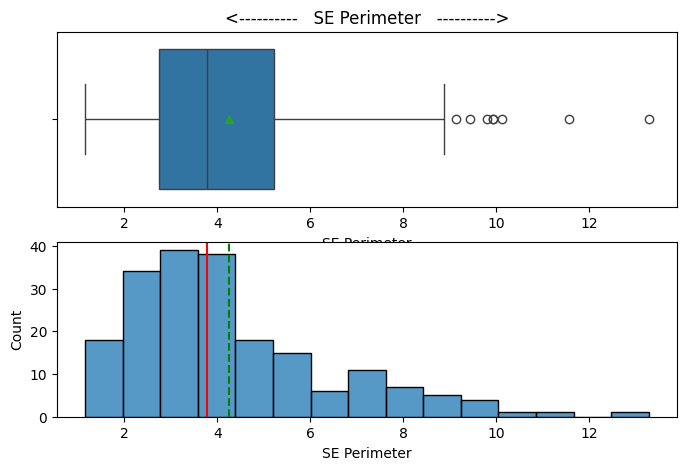

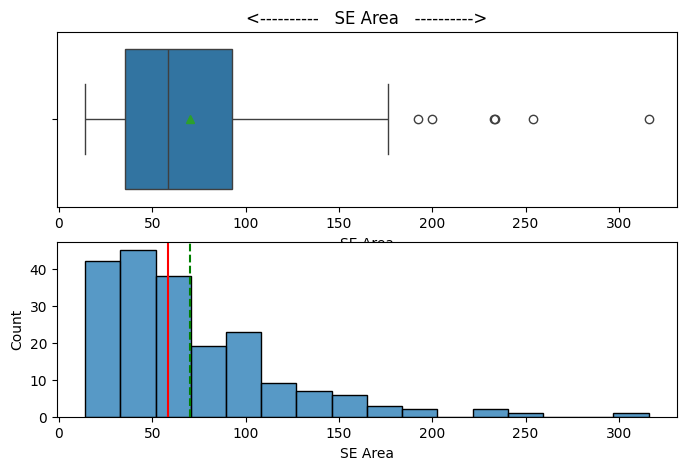

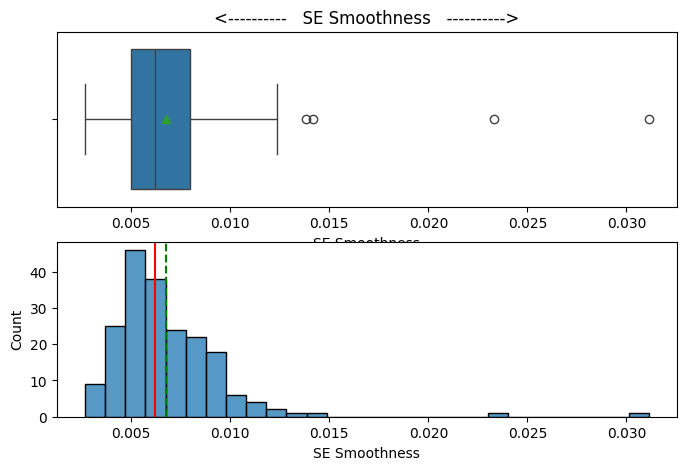

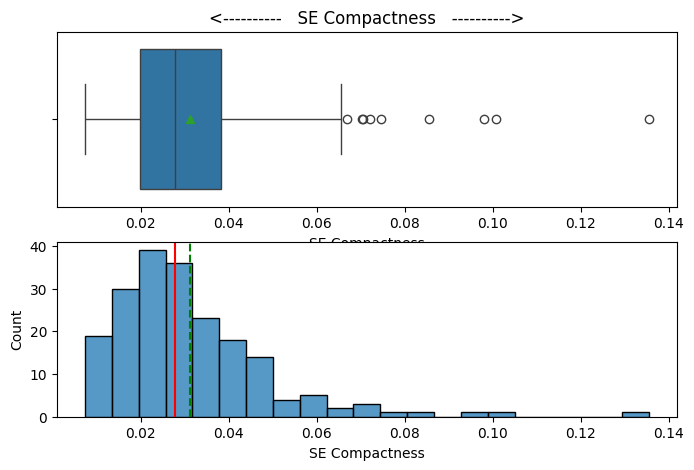

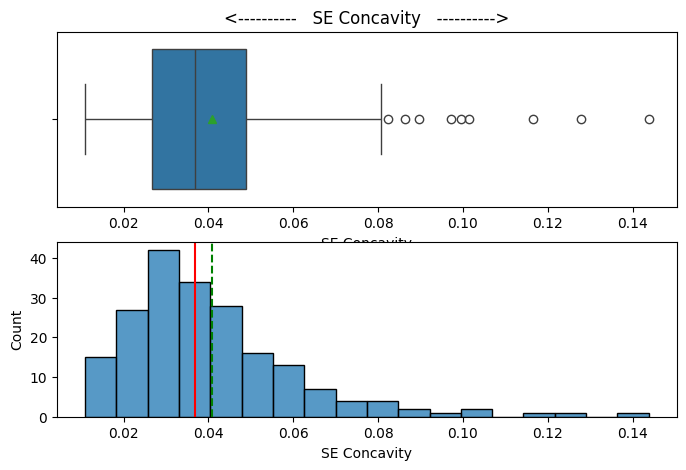

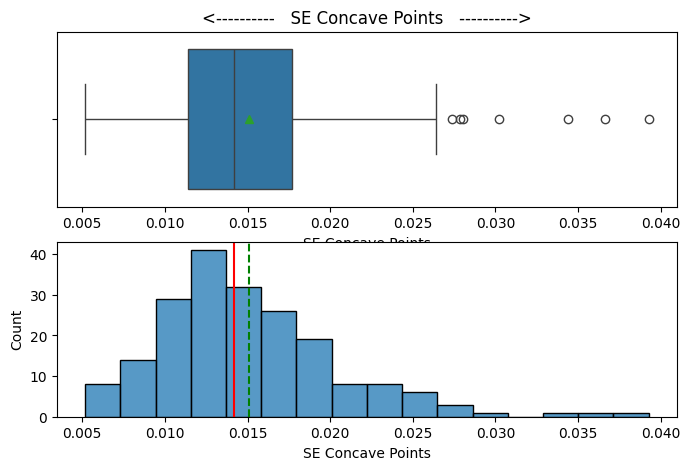

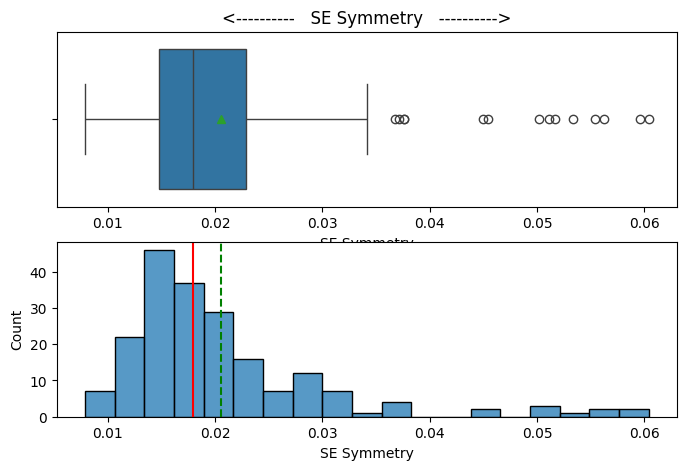

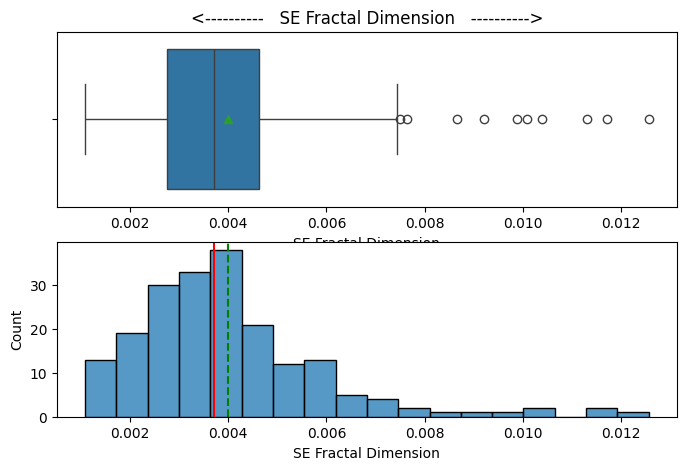

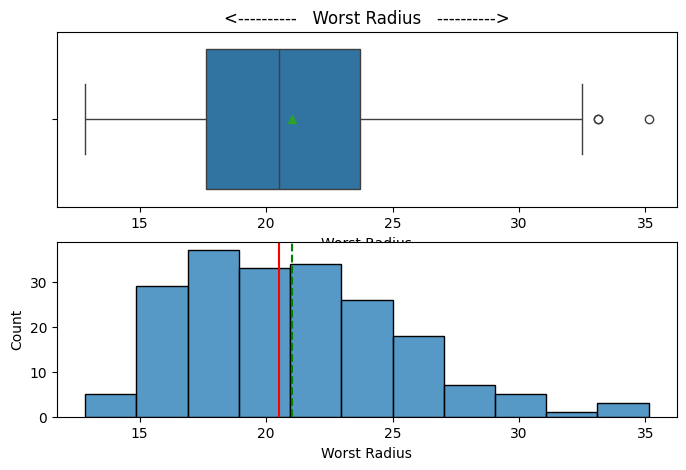

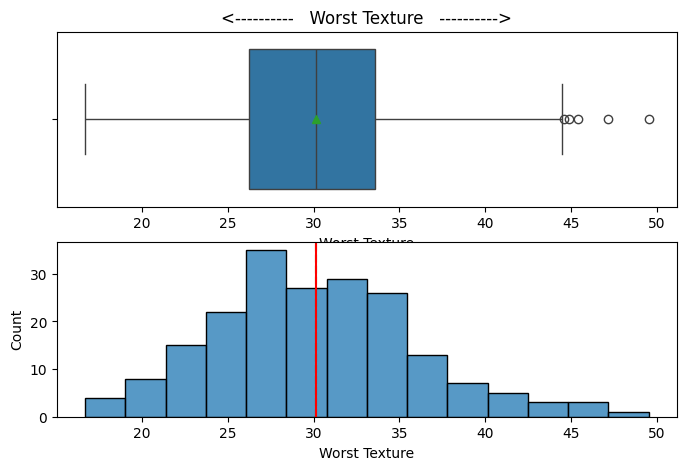

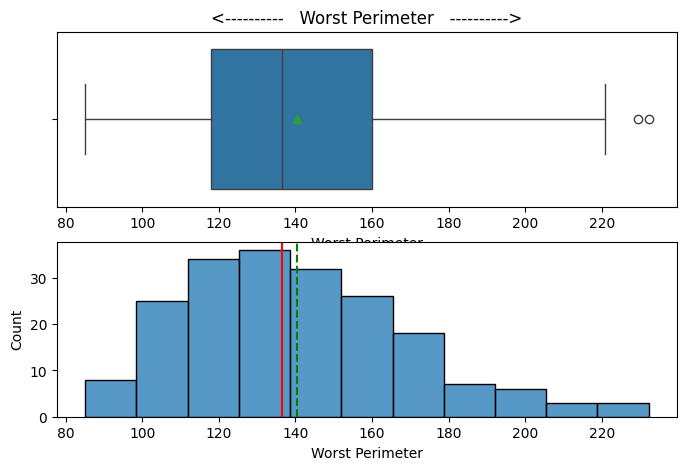

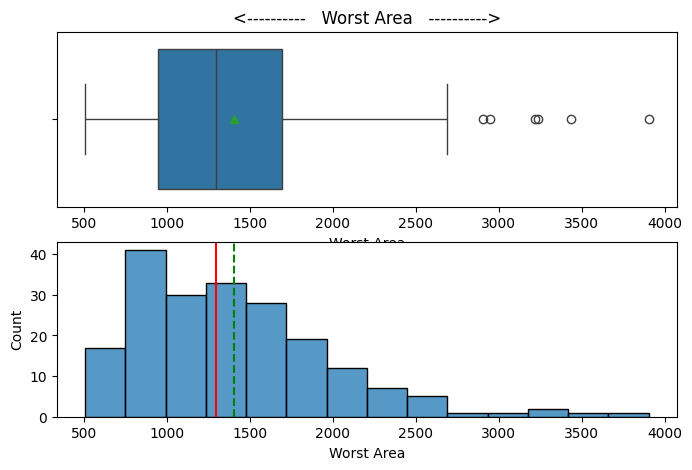

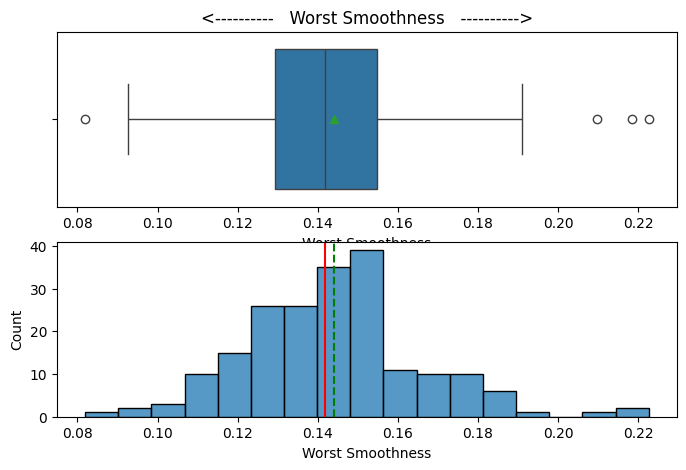

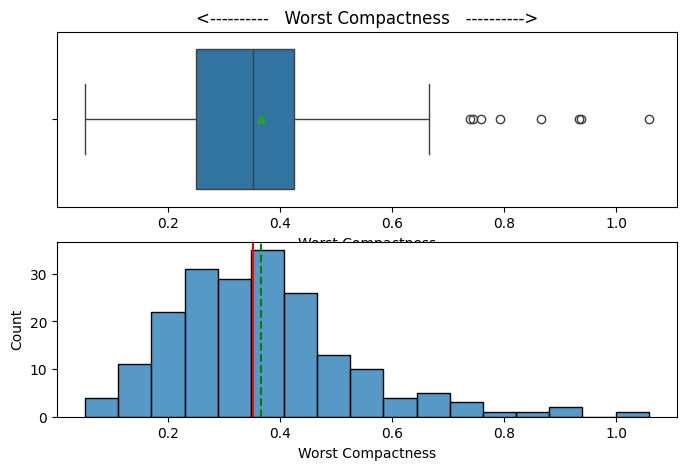

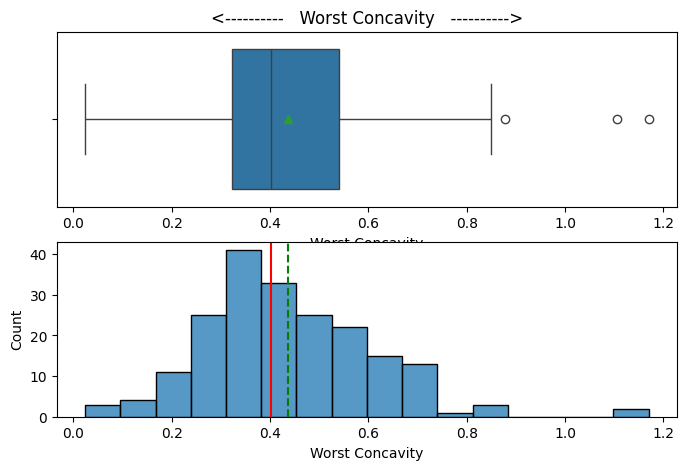

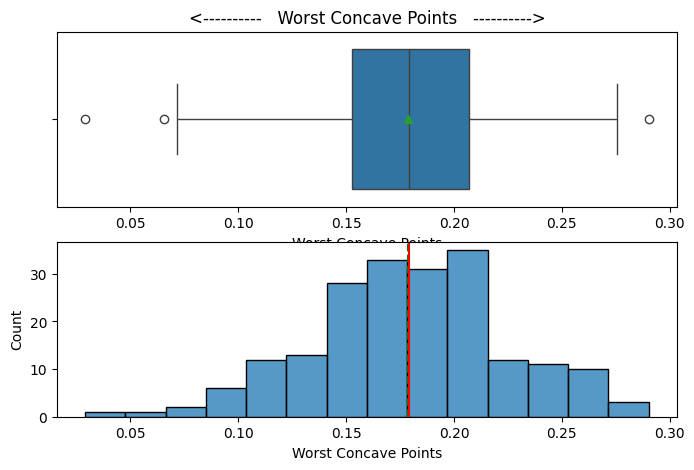

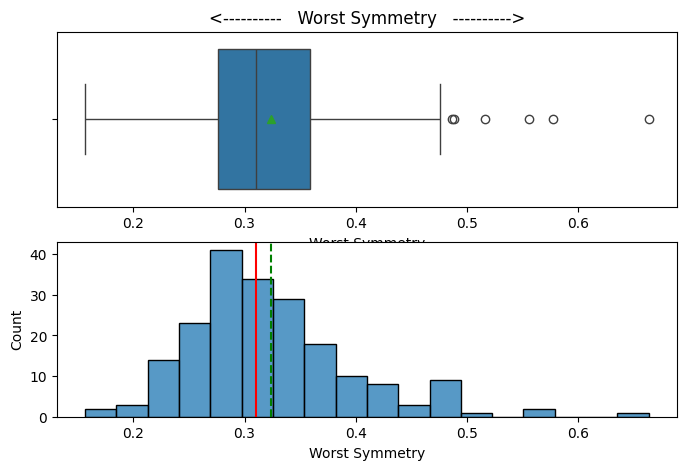

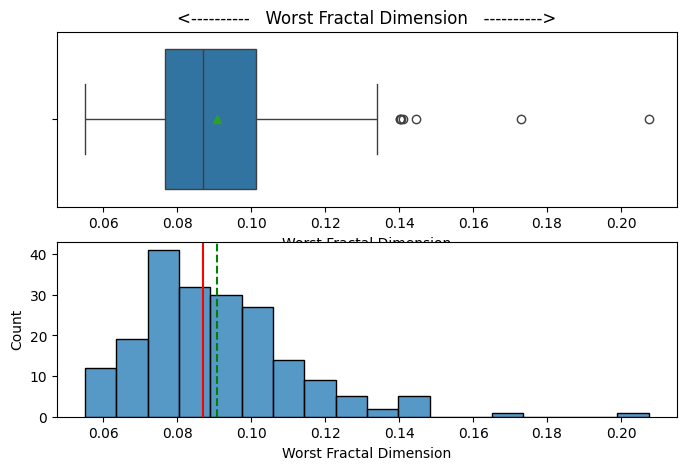

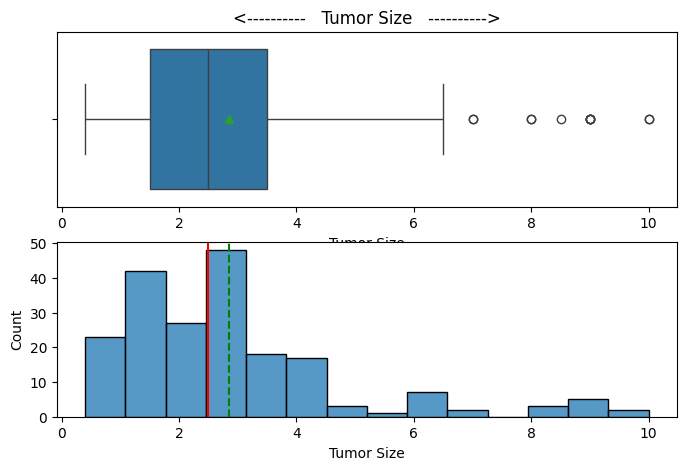

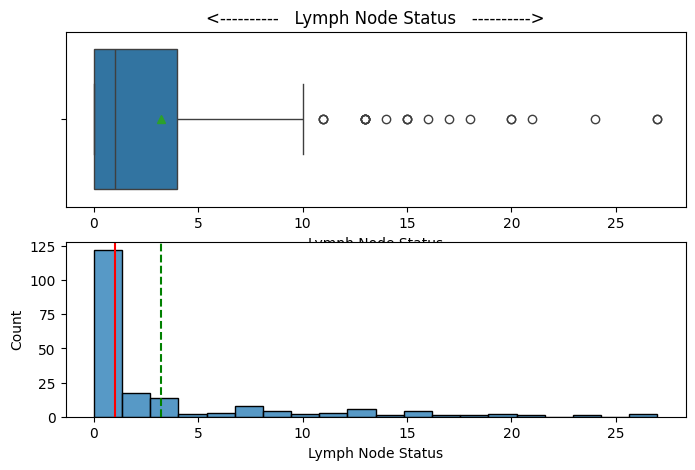

In [10]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    plt.subplot(2, 1, 1)
    plt.title("<----------   " + col + "   ---------->")
    sns.boxplot(data=final_data, x=col, showmeans=True)
    plt.subplot(2, 1, 2)
    sns.histplot(data=final_data, x=col)
    plt.axvline(final_data[col].mean(), color="green", linestyle="--")
    plt.axvline(final_data[col].median(), color="red", linestyle="-")
    plt.show()

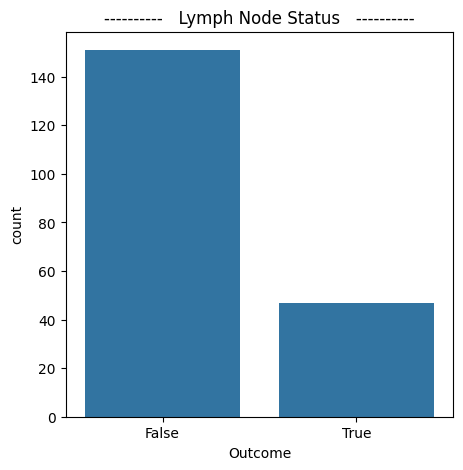

In [11]:
plt.figure(figsize=(5, 5))
plt.title("----------   " + col + "   ----------")
sns.countplot(data=final_data, x='Outcome')
plt.show()

## Question 1.d


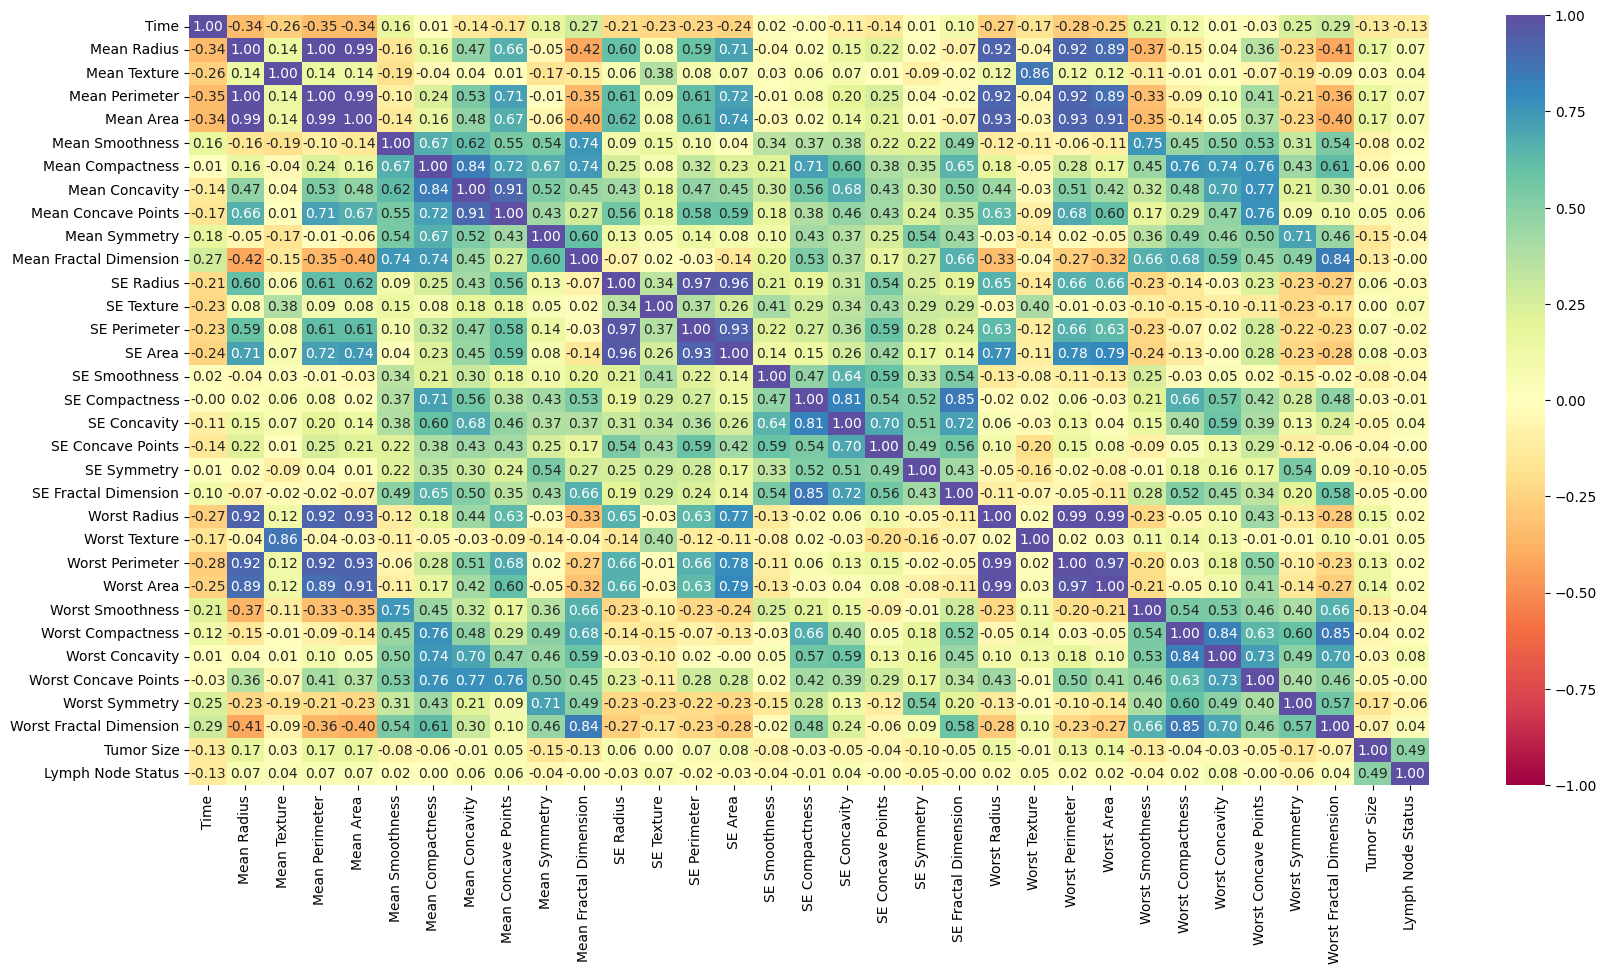

In [12]:
# correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(final_data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Question 1.e

In [13]:
correlation = final_data['SE Perimeter'].corr(final_data['Mean Perimeter'])
correlation

0.6099643781634988

## Question 2
### Logistic Regression with One Variable

## Question 2.a

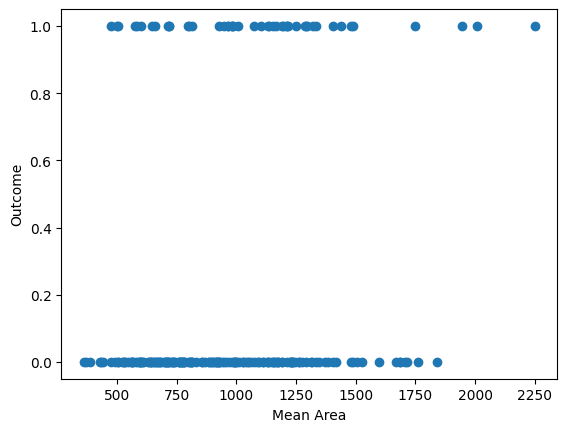

In [14]:
plt.scatter(x = final_data['Mean Area'], y = final_data['Outcome'])
plt.xlabel('Mean Area')
plt.ylabel('Outcome')
plt.show()


In [15]:
x = final_data[['Mean Area']]
y = final_data[['Outcome']]

In [16]:
# splitting training and testing data
def train_test_split(x, y, ratio):
    m = x.shape[0]
    x_index = list(x.index)
    random.seed(10)
    train_index = random.sample(x_index, int(m*ratio))
    test_index = [x for x in x_index if x not in train_index]
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train = y_train.to_numpy()
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.to_numpy()
    y_test = y_test.reshape(-1, 1)
    
    return x_train, x_test, y_train, y_test
    
    

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 0.75)

In [18]:
# sigmoid function
def sigmoid(z):
    A = 1/(1 + np.exp(-z))
    return A

In [19]:
# prediction funtion
def prediction(theta_0, theta_1, x):
    z = theta_0 + (np.dot(x, theta_1))
    y_hat = sigmoid(z)
    return y_hat

In [20]:
# initializing parameters
def initialize_parameters(n):
    theta_0 = np.zeros((1, 1))
    theta_1 = np.zeros((n, 1))
    return theta_0, theta_1


In [21]:
# Logistic loss cost function
def loss_func(y_hat, y):
    m = y.shape[0]
    l1 = y * np.log(y_hat)
    l2 = (1 - y) * np.log(1 - y_hat)
    loss = -np.sum(l1 + l2) / m
    return loss

## Question 2.b

In [22]:
# Function for confusion matrix
def conf_matrix(y, y_hat, plot = True):

    # Initialize the elements of the confusion matrix
    tp, tn, fp, fn = 0, 0, 0, 0

    for true_value, pred_value in zip(y, y_hat):
        if true_value == 1 and pred_value == 1:
            tp += 1
        elif true_value == 0 and pred_value == 0:
            tn += 1
        elif true_value == 0 and pred_value == 1:
            fp += 1
        else:
            fn += 1

    conf_mat = {"True Positive": tp, "True Negative": tn, "False Positive": fp, 
                "False Negative": fn}
    if tp == 0:
        recall = 0
        precision = 0
        fscore = 0
    else:
        recall = tp/(tp + fn)
        precision = tp/(tp + fp)
        fscore = (2*recall*precision)/(recall + precision)
    print(f'recall = {recall}\nprecision = {precision}\nfscore = {fscore}')
    return conf_mat

In [23]:
# Gradient Descent function
def GD(x, y, alpha, iterations, plot = True):
    n = x.shape[1]
    theta_0, theta_1 = initialize_parameters(n)
    
    for i in range(iterations):
        y_hat = prediction(theta_0, theta_1, x)
        loss = loss_func(y_hat, y)
        
        m = x.shape[0]
    
        dtheta_0 = (1/m) * (np.sum(y_hat - y))
        dtheta_1 = (1/m) * (np.dot(x.T, (y_hat - y)))
    
        theta_0 = theta_0 - (alpha * dtheta_0)
        theta_1 = theta_1 - (alpha * dtheta_1)
        
        if i % 1000 == 0:
            print(f'iteration: {i} ---> loss: {loss}')
    
    y_hat = prediction(theta_0, theta_1, x)
    y_hat = (y_hat > 0.5).astype(int)
    BIC = -2*(-m*loss) + n * np.log(m)
    conf_mat = conf_matrix(y, y_hat, plot)
    
    print(f'BIC = {BIC}\n{conf_mat}')
    return (theta_0, theta_1), BIC

In [24]:
params, bic = GD(x_train, y_train, alpha = 0.00001, iterations = 10000, plot = True)

iteration: 0 ---> loss: 0.6931471805599454
iteration: 1000 ---> loss: 0.5838333430864953
iteration: 2000 ---> loss: 0.5837981401205673
iteration: 3000 ---> loss: 0.5837629531247843
iteration: 4000 ---> loss: 0.5837277820924298
iteration: 5000 ---> loss: 0.583692627016789
iteration: 6000 ---> loss: 0.583657487891149
iteration: 7000 ---> loss: 0.5836223647087988
iteration: 8000 ---> loss: 0.5835872574630293
iteration: 9000 ---> loss: 0.5835521661471336
recall = 0
precision = 0
fscore = 0
BIC = 177.7182815170309
{'True Positive': 0, 'True Negative': 115, 'False Positive': 0, 'False Negative': 33}


In [25]:
def predict(params, x, y):
    theta_0, theta_1 = params
    z = theta_0 + (np.dot(x, theta_1))
    y_hat = sigmoid(z)
    y_hat = (y_hat > 0.5).astype(int)
    conf_mat = conf_matrix(y, y_hat)
    return conf_mat

In [26]:
predict(params, x_test, y_test)

recall = 0
precision = 0
fscore = 0


{'True Positive': 0,
 'True Negative': 36,
 'False Positive': 0,
 'False Negative': 14}

## Question 3
### Logistic regression with multiple variables

## Question 3.a

In [27]:
columns = ['Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Fractal Dimension', 'SE Perimeter', 'SE Texture', 'SE Area']
x = final_data[columns]
y = final_data[['Outcome']]

x_train, x_test, y_train, y_test = train_test_split(x, y, 0.75)


In [28]:
params, bic = GD(x_train, y_train, alpha = 0.00001, iterations = 10000)

iteration: 0 ---> loss: 0.6931471805599454
iteration: 1000 ---> loss: 0.5488796158149762
iteration: 2000 ---> loss: 0.541454498769282
iteration: 3000 ---> loss: 0.5384467543941838
iteration: 4000 ---> loss: 0.5366913255845931
iteration: 5000 ---> loss: 0.5355679132698985
iteration: 6000 ---> loss: 0.5348378800589167
iteration: 7000 ---> loss: 0.5343526526972432
iteration: 8000 ---> loss: 0.5340149771054084
iteration: 9000 ---> loss: 0.5337643693533148
recall = 0.24242424242424243
precision = 0.34782608695652173
fscore = 0.28571428571428575
BIC = 221.89221122914313
{'True Positive': 8, 'True Negative': 100, 'False Positive': 15, 'False Negative': 25}


In [29]:
predict(params, x_test, y_test)

recall = 0.07142857142857142
precision = 0.3333333333333333
fscore = 0.11764705882352941


{'True Positive': 1,
 'True Negative': 34,
 'False Positive': 2,
 'False Negative': 13}

## Question 3.b

In [30]:
# forward Selection
def forward_stepwise(x, y, start, alpha, iterations):
    random.seed(100)
    colms = list(x.columns)
    first = random.sample(colms, start)
    feature_to_add = None
    bic_base = float('inf')
    
    for i in range(0, 5):
        print(f'####################### Iteration {i + 1} #######################')
        if feature_to_add:
            first = first + feature_to_add
        
        print(first)
            
        remaining = [cols for cols in colms if cols not in first]
        #x_base = x[first]
        #print(f'####### Base model with {start + i} features #######')
        #params, bic_base = GD(x_base, y, alpha, iterations)
        forward_bics = {}
    
        for feature in remaining:
            features_to_test = first.copy()
            features_to_test.append(feature)
            x_train = x[features_to_test]
            print(f'####### Model with {feature} added to Base model #######')
            params, bic = GD(x_train, y, alpha, iterations, plot = False)
        
            if bic_base > bic:
                forward_bics[feature] = bic
    
        if forward_bics:
            min_bic = min(forward_bics.values())
            feature_to_add = [key for key in forward_bics if forward_bics[key] == min_bic]
            bic_base = min_bic
            print(feature_to_add)
        else:
            print(f"No further features to add.\nModel with {start + i} features is the best model.")
            return first 
    
    return first + feature_to_add
    
    

In [31]:
features = forward_stepwise(x_train, y_train, 6, alpha=0.00001, iterations= 10000)

####################### Iteration 1 #######################
['Mean Perimeter', 'Mean Concave Points', 'SE Texture', 'SE Area', 'Mean Concavity', 'Mean Compactness']
####### Model with Mean Radius added to Base model #######
iteration: 0 ---> loss: 0.6931471805599454
iteration: 1000 ---> loss: 0.5330974114979096
iteration: 2000 ---> loss: 0.5321432615017558
iteration: 3000 ---> loss: 0.5320804581693648
iteration: 4000 ---> loss: 0.5320395493994233
iteration: 5000 ---> loss: 0.5319992404044572
iteration: 6000 ---> loss: 0.5319589886557955
iteration: 7000 ---> loss: 0.531918780190879
iteration: 8000 ---> loss: 0.5318786146034664
iteration: 9000 ---> loss: 0.5318384918353791
recall = 0.030303030303030304
precision = 0.3333333333333333
fscore = 0.05555555555555555
BIC = 192.3928276775857
{'True Positive': 1, 'True Negative': 113, 'False Positive': 2, 'False Negative': 32}
####### Model with Mean Texture added to Base model #######
iteration: 0 ---> loss: 0.6931471805599454
iteration: 1000 -

In [32]:
x = final_data[features]
y = final_data[['Outcome']]

x_train, x_test, y_train, y_test = train_test_split(x, y, 0.75)


In [33]:
params, bic = GD(x_train, y_train, 0.00001, 10000)

iteration: 0 ---> loss: 0.6931471805599454
iteration: 1000 ---> loss: 0.529069492985519
iteration: 2000 ---> loss: 0.5264401359518711
iteration: 3000 ---> loss: 0.5248139501509265
iteration: 4000 ---> loss: 0.5233388456165752
iteration: 5000 ---> loss: 0.5219845072634982
iteration: 6000 ---> loss: 0.520740352432773
iteration: 7000 ---> loss: 0.5195970867070493
iteration: 8000 ---> loss: 0.5185462108202412
iteration: 9000 ---> loss: 0.517579949328822
recall = 0.030303030303030304
precision = 0.25
fscore = 0.054054054054054064
BIC = 187.92133089887733
{'True Positive': 1, 'True Negative': 112, 'False Positive': 3, 'False Negative': 32}


In [34]:
features

['Mean Perimeter',
 'Mean Concave Points',
 'SE Texture',
 'SE Area',
 'Mean Concavity',
 'Mean Compactness',
 'Mean Texture']

In [35]:
conf_mat = predict(params, x_test, y_test)
conf_mat

recall = 0.07142857142857142
precision = 0.5
fscore = 0.125


{'True Positive': 1,
 'True Negative': 35,
 'False Positive': 1,
 'False Negative': 13}

## Question 4
### Experimenting with regularization and Cost function

## Question 4.a.i

In [36]:
# Logistic loss cost function
def reg_loss_func(y_hat, y, theta_1, lamda):
    m = y.shape[0]
    l1 = y * np.log(y_hat)
    l2 = (1 - y) * np.log(1 - y_hat)
    loss = (1/m) * (-np.sum(l1 + l2)) + (lamda/(2*m)) * (np.sum(theta_1**2))
    return loss

In [37]:
def reg_GD(x, y, alpha, iterations, lamda):
    n = x.shape[1]
    theta_0, theta_1 = initialize_parameters(n)
    
    for i in range(iterations):
        y_hat = prediction(theta_0, theta_1, x)
        loss = reg_loss_func(y_hat, y, theta_1, lamda)
        
        m = x.shape[0]
    
        dtheta_0 = (1/m) * (np.sum(y_hat - y))
        dtheta_1 = (1/m) * (np.dot(x.T, (y_hat - y))) + ((lamda / m) * theta_1)
    
        theta_0 = theta_0 - (alpha * dtheta_0)
        theta_1 = theta_1 - (alpha * dtheta_1)
        
        if i % 1000 == 0:
            print(f'iteration: {i} ---> loss: {loss}')
    
    y_hat = prediction(theta_0, theta_1, x)
    y_hat = (y_hat > 0.5).astype(int)
    BIC = -2*(-m*loss) + n * np.log(m)
    conf_mat = conf_matrix(y, y_hat)
    
    print(f'BIC = {BIC}\n{conf_mat}')
    return (theta_0, theta_1), BIC

In [38]:
params, bic = reg_GD(x_train, y_train, 0.00001, 10000, lamda = 10)

iteration: 0 ---> loss: 0.6931471805599454
iteration: 1000 ---> loss: 0.5290860943797546
iteration: 2000 ---> loss: 0.5264618370953369
iteration: 3000 ---> loss: 0.5248411500259816
iteration: 4000 ---> loss: 0.5233730284754688
iteration: 5000 ---> loss: 0.5220269311979722
iteration: 6000 ---> loss: 0.5207920263703878
iteration: 7000 ---> loss: 0.5196588025583742
iteration: 8000 ---> loss: 0.51861857363984
iteration: 9000 ---> loss: 0.5176634038629024
recall = 0.030303030303030304
precision = 0.25
fscore = 0.054054054054054064
BIC = 187.94940426369615
{'True Positive': 1, 'True Negative': 112, 'False Positive': 3, 'False Negative': 32}


## Question 4.a.ii

In [39]:
# Normalize each column
def normalize(column):
    mean = column.mean()
    std = column.std()
    column = (column - mean)/std
    return column

In [40]:
x = final_data[features].agg(normalize)
y = final_data[['Outcome']]

x_train, x_test, y_train, y_test = train_test_split(x, y, 0.75)


In [41]:
params, bic = GD(x_train, y_train, 0.0005, 10000)

iteration: 0 ---> loss: 0.6931471805599454
iteration: 1000 ---> loss: 0.6510048156597976
iteration: 2000 ---> loss: 0.618470216218664
iteration: 3000 ---> loss: 0.5931442018481916
iteration: 4000 ---> loss: 0.573253101148317
iteration: 5000 ---> loss: 0.5574885750996292
iteration: 6000 ---> loss: 0.544883197679101
iteration: 7000 ---> loss: 0.534717727846822
iteration: 8000 ---> loss: 0.5264535429166787
iteration: 9000 ---> loss: 0.5196839372141401
recall = 0.09090909090909091
precision = 1.0
fscore = 0.16666666666666669
BIC = 187.15533258032826
{'True Positive': 3, 'True Negative': 115, 'False Positive': 0, 'False Negative': 30}


In [42]:
predict(params, x_test, y_test)

recall = 0.07142857142857142
precision = 0.5
fscore = 0.125


{'True Positive': 1,
 'True Negative': 35,
 'False Positive': 1,
 'False Negative': 13}

## Question 4.b.i

In [43]:
# changed cost function
def mse_loss_func(y_hat, y):
    m = y.shape[0]
    err = y_hat - y
    sqerr = np.sum((y_hat - y) ** 2) 
    loss = (1/(2*m)) * (sqerr)
    return loss

In [44]:
def GD(x, y, alpha, iterations, plot = True):
    n = x.shape[1]
    theta_0, theta_1 = initialize_parameters(n)
    
    for i in range(iterations):
        y_hat = prediction(theta_0, theta_1, x)
        loss = mse_loss_func(y_hat, y)
        
        m = x.shape[0]
    
        dtheta_0 = (1/m) * (np.sum(y_hat - y))
        dtheta_1 = (1/m) * (np.dot(x.T, (y_hat - y)))
    
        theta_0 = theta_0 - (alpha * dtheta_0)
        theta_1 = theta_1 - (alpha * dtheta_1)
        
        if i % 1000 == 0:
            print(f'iteration: {i} ---> loss: {loss}')
    
    y_hat = prediction(theta_0, theta_1, x)
    y_hat = (y_hat > 0.5).astype(int)
    BIC = -2*(-m*loss) + n * np.log(m)
    conf_mat = conf_matrix(y, y_hat, plot)
    
    print(f'BIC = {BIC}\n{conf_mat}')
    return (theta_0, theta_1), BIC

In [45]:
params, bic = GD(x_train, y_train, 0.0005, 10000)

iteration: 0 ---> loss: 0.125
iteration: 1000 ---> loss: 0.11449605110613557
iteration: 2000 ---> loss: 0.10651704882535679
iteration: 3000 ---> loss: 0.10046837051463395
iteration: 4000 ---> loss: 0.09586837223931623
iteration: 5000 ---> loss: 0.09234855940919448
iteration: 6000 ---> loss: 0.08963463663350772
iteration: 7000 ---> loss: 0.08752474450624576
iteration: 8000 ---> loss: 0.08587068243060708
iteration: 9000 ---> loss: 0.08456334187305263
recall = 0.09090909090909091
precision = 1.0
fscore = 0.16666666666666669
BIC = 59.70325474635506
{'True Positive': 3, 'True Negative': 115, 'False Positive': 0, 'False Negative': 30}


In [46]:
predict(params, x_test, y_test)

recall = 0.07142857142857142
precision = 0.5
fscore = 0.125


{'True Positive': 1,
 'True Negative': 35,
 'False Positive': 1,
 'False Negative': 13}